<a href="https://colab.research.google.com/github/MuhammadAshiqAmeer/Federated_learning_experiments_with_Intel-openfl/blob/colab/neuroblastoma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/MyDrive/federated

/content/drive/MyDrive/federated


In [3]:
!ls

'Federated lemon-melon CNN classifier'	 neuroblastoma.xlsx


In [4]:
import pandas as pd

df = pd.read_excel("neuroblastoma.xlsx")

In [5]:
df

,TARGET USI,Gender,Age at Diagnosis in Days,Event Free Survival Time in Days,Vital Status,Overall Survival Time in Days,INSS Stage,MYCN status,Ploidy Value,Histology,MKI,COG Risk Group
0,TARGET-30-PARPUF,Male,96,3701,Alive,3701,Stage 4,Not Amplified,1.48,Favorable,Low,Intermediate Risk
1,TARGET-30-PARSVF,Male,964,997,Dead,1516,Stage 4,Not Amplified,1.00,Unfavorable,High,High Risk
2,TARGET-30-PARSXI,Female,538,3928,Alive,3928,Stage 4,Not Amplified,1.99,Favorable,Low,Intermediate Risk
3,TARGET-30-PARSZV,Male,287,2675,Alive,3995,Stage 2a,Not Amplified,1.58,Favorable,Low,Low Risk
4,TARGET-30-PARTCE,Male,67,3625,Alive,3625,Stage 1,Not Amplified,2.13,Favorable,Low,Low Risk
...,...,...,...,...,...,...,...,...,...,...,...,...
733,TARGET-30-PATILE,Male,824,306,Dead,306,Stage 4,Not Amplified,1.00,Unfavorable,Intermediate,High Risk
734,TARGET-30-PATINJ,Male,1037,736,Dead,822,Stage 4,Not Amplified,1.00,Unfavorable,Intermediate,High Risk
735,TARGET-30-PATNKP,Male,3446,616,Dead,1549,Stage 4,Not Amplified,1.47,Unfavorable,Intermediate,High Risk
736,TARGET-30-PATYIL,Female,328,239,Dead,481,Stage 4,Not Amplified,1.00,Favorable,Intermediate,Intermediate Risk


In [6]:
df.describe()

,Age at Diagnosis in Days,Event Free Survival Time in Days,Overall Survival Time in Days,Ploidy Value
count,738.000000,738.000000,738.000000,738.000000
mean,942.105691,1907.228997,2261.162602,1.322967
std,928.520081,1466.809684,1341.896447,0.353940
min,1.000000,10.000000,10.000000,0.960000
25%,315.250000,491.500000,960.750000,1.000000
50%,740.500000,1762.500000,2428.500000,1.220000
75%,1264.500000,3198.000000,3351.750000,1.530000
max,7613.000000,6170.000000,6170.000000,3.000000


In [7]:
df["Gender"]=df["Gender"].replace({"Male":1,"Female":0})
df['Gender']

0      1
1      1
2      0
3      1
4      1
      ..
733    1
734    1
735    1
736    0
737    1
Name: Gender, Length: 738, dtype: int64

In [8]:
df["Vital Status"]=df["Vital Status"].replace({"Dead":0,"Alive":1})
df["Vital Status"]

0      1
1      0
2      1
3      1
4      1
      ..
733    0
734    0
735    0
736    0
737    1
Name: Vital Status, Length: 738, dtype: int64

In [9]:
df["INSS Stage"].unique()

array(['Stage 4', 'Stage 2a', 'Stage 1', 'Stage 3', 'Stage 4s',
       'Stage 2b'], dtype=object)

In [10]:
df["INSS Stage"]=df["INSS Stage"].replace({"Stage 1":0,"Stage 2a":1,"Stage 2b":2,"Stage 3":3,"Stage 4":4,"Stage 4s":5,})
df["INSS Stage"]

0      4
1      4
2      4
3      1
4      0
      ..
733    4
734    4
735    4
736    4
737    3
Name: INSS Stage, Length: 738, dtype: int64

In [11]:
df["MYCN status"].unique()

array(['Not Amplified', 'Amplified'], dtype=object)

In [12]:
df["MYCN status"]=df["MYCN status"].replace({"Not Amplified":0,"Amplified":1})
df["MYCN status"]

0      0
1      0
2      0
3      0
4      0
      ..
733    0
734    0
735    0
736    0
737    0
Name: MYCN status, Length: 738, dtype: int64

In [13]:
df["Histology"].unique()

array(['Favorable', 'Unfavorable'], dtype=object)

In [14]:
df["MKI"].unique()

array(['Low', 'High', 'Intermediate'], dtype=object)

In [15]:
df["COG Risk Group"].unique()

array(['Intermediate Risk', 'High Risk', 'Low Risk'], dtype=object)

In [16]:
df["Histology"]=df["Histology"].replace({"Favorable":0,"Unfavorable":1})
df["MKI"]=df["MKI"].replace({"Low":0,"High":1,"Intermediate":2})
df["COG Risk Group"]=df["COG Risk Group"].replace({"Low Risk":0,"Intermediate Risk":1,"High Risk":2})

In [17]:
print(df["Histology"])
print(df["MKI"])
print(df["COG Risk Group"])

0      0
1      1
2      0
3      0
4      0
      ..
733    1
734    1
735    1
736    0
737    0
Name: Histology, Length: 738, dtype: int64
0      0
1      1
2      0
3      0
4      0
      ..
733    2
734    2
735    2
736    2
737    0
Name: MKI, Length: 738, dtype: int64
0      1
1      2
2      1
3      0
4      0
      ..
733    2
734    2
735    2
736    1
737    1
Name: COG Risk Group, Length: 738, dtype: int64


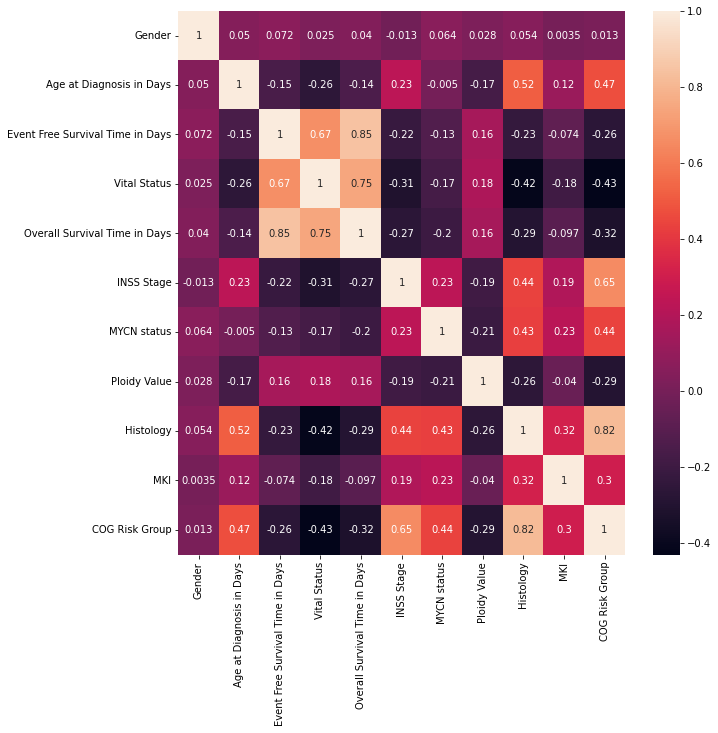

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns,
         annot=True)

In [19]:
df["Overall Survival Time in Years"] = round(df["Overall Survival Time in Days"]/365,0)
df["Overall Survival Time in Years"]
df["Overall Survival Time in Years"].unique()

array([10.,  4., 11.,  6.,  0.,  9.,  3.,  5.,  7.,  2.,  8.,  1., 14.,
       12., 17., 13., 15.])

In [20]:
df

,TARGET USI,Gender,Age at Diagnosis in Days,Event Free Survival Time in Days,Vital Status,Overall Survival Time in Days,INSS Stage,MYCN status,Ploidy Value,Histology,MKI,COG Risk Group,Overall Survival Time in Years
0,TARGET-30-PARPUF,1,96,3701,1,3701,4,0,1.48,0,0,1,10.0
1,TARGET-30-PARSVF,1,964,997,0,1516,4,0,1.00,1,1,2,4.0
2,TARGET-30-PARSXI,0,538,3928,1,3928,4,0,1.99,0,0,1,11.0
3,TARGET-30-PARSZV,1,287,2675,1,3995,1,0,1.58,0,0,0,11.0
4,TARGET-30-PARTCE,1,67,3625,1,3625,0,0,2.13,0,0,0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
733,TARGET-30-PATILE,1,824,306,0,306,4,0,1.00,1,2,2,1.0
734,TARGET-30-PATINJ,1,1037,736,0,822,4,0,1.00,1,2,2,2.0
735,TARGET-30-PATNKP,1,3446,616,0,1549,4,0,1.47,1,2,2,4.0
736,TARGET-30-PATYIL,0,328,239,0,481,4,0,1.00,0,2,1,1.0


In [21]:
x=df.drop(['Vital Status','TARGET USI','Event Free Survival Time in Days','Overall Survival Time in Days'],axis=1)
x

,Gender,Age at Diagnosis in Days,INSS Stage,MYCN status,Ploidy Value,Histology,MKI,COG Risk Group,Overall Survival Time in Years
0,1,96,4,0,1.48,0,0,1,10.0
1,1,964,4,0,1.00,1,1,2,4.0
2,0,538,4,0,1.99,0,0,1,11.0
3,1,287,1,0,1.58,0,0,0,11.0
4,1,67,0,0,2.13,0,0,0,10.0
...,...,...,...,...,...,...,...,...,...
733,1,824,4,0,1.00,1,2,2,1.0
734,1,1037,4,0,1.00,1,2,2,2.0
735,1,3446,4,0,1.47,1,2,2,4.0
736,0,328,4,0,1.00,0,2,1,1.0


In [22]:
#x_train=x.iloc[0:590]
#x_test=x.iloc[590:738]

In [23]:
#x_train

In [24]:
#x_test

In [25]:
y=df['Vital Status']
y

0      1
1      0
2      1
3      1
4      1
      ..
733    0
734    0
735    0
736    0
737    1
Name: Vital Status, Length: 738, dtype: int64

In [26]:
#y_train=y.iloc[0:590]
#y_test=y.iloc[590:738]

In [27]:
#y_train

In [28]:
#y_test

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_scaled = scaler.fit_transform(x)
#test_scaled = scaler.transform(x_test)

In [30]:
train_scaled

array([[ 0.86056147, -0.91185913,  0.45284274, ..., -1.09669375,
        -0.6098716 ,  1.0368464 ],
       [ 0.86056147,  0.02359578,  0.45284274, ...,  0.11130623,
         0.65087137, -0.59353565],
       [-1.16203204, -0.43550997,  0.45284274, ..., -1.09669375,
        -0.6098716 ,  1.30857674],
       ...,
       [ 0.86056147,  2.69847954,  0.45284274, ...,  1.31930621,
         0.65087137, -0.59353565],
       [-1.16203204, -0.66182971,  0.45284274, ...,  1.31930621,
        -0.6098716 , -1.40872668],
       [ 0.86056147, -0.62626518, -0.27844379, ..., -1.09669375,
        -0.6098716 ,  0.22165537]])

# Vital status

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import numpy as np

model = Sequential()
model.add(Dense(32, input_shape=(9,)))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy']) 
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 32)                320       
                                                                 
 activation_30 (Activation)  (None, 32)                0         
                                                                 
 dense_31 (Dense)            (None, 16)                528       
                                                                 
 activation_31 (Activation)  (None, 16)                0         
                                                                 
 dense_32 (Dense)            (None, 1)                 17        
                                                                 
 activation_32 (Activation)  (None, 1)                 0         
                                                                 
Total params: 865
Trainable params: 865
Non-trainable

In [66]:
trained_model=model.fit(train_scaled, y,validation_split=0.3,epochs=100,batch_size=20)

Epoch 1/100
26/26 [==============================] - 1s 9ms/step - loss: 0.6275 - accuracy: 0.7112 - val_loss: 0.7126 - val_accuracy: 0.5000
Epoch 2/100
26/26 [==============================] - 0s 3ms/step - loss: 0.5889 - accuracy: 0.7151 - val_loss: 0.6846 - val_accuracy: 0.5000
Epoch 3/100
26/26 [==============================] - 0s 3ms/step - loss: 0.5543 - accuracy: 0.7171 - val_loss: 0.6583 - val_accuracy: 0.5045
Epoch 4/100
26/26 [==============================] - 0s 4ms/step - loss: 0.5242 - accuracy: 0.7190 - val_loss: 0.6335 - val_accuracy: 0.5045
Epoch 5/100
26/26 [==============================] - 0s 3ms/step - loss: 0.4978 - accuracy: 0.7171 - val_loss: 0.6100 - val_accuracy: 0.5045
Epoch 6/100
26/26 [==============================] - 0s 5ms/step - loss: 0.4743 - accuracy: 0.7248 - val_loss: 0.5866 - val_accuracy: 0.5315
Epoch 7/100
26/26 [==============================] - 0s 4ms/step - loss: 0.4532 - accuracy: 0.7306 - val_loss: 0.5647 - val_accuracy: 0.6081
Epoch 8/100
2

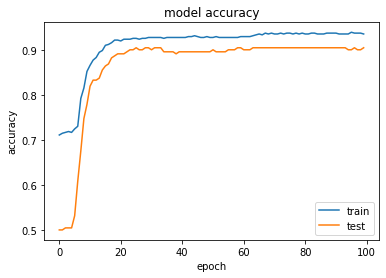

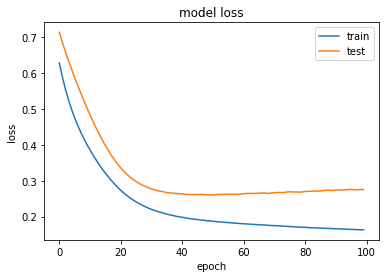

In [67]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(trained_model.history['accuracy'])
plt.plot(trained_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(trained_model.history['loss'])
plt.plot(trained_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# Split data into 3
